In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.0101,0.0202,0.0303,0.0404,0.0505,...,0.949,0.96,0.97,0.98,0.99,1
y,0.921,0.248,0.0917,0.172,0.589,0.484,...,0.304,0.343,0.794,0.543,0.822,0.0504
a,0,2.53e-05,3.74e-05,0.000158,0.000961,0.00123,...,0.274,0.316,0.747,0.521,0.805,0.0504


In [4]:
p['a']

0,2.53e-05,3.74e-05,0.000158,0.000961,0.00123,...,0.274,0.316,0.747,0.521,0.805,0.0504


In [5]:
np.array(p['a'])

array([0.00000000e+00, 2.52900193e-05, 3.74325383e-05, 1.58287472e-04,
       9.61322159e-04, 1.23413636e-03, 2.89477917e-03, 1.09826093e-03,
       5.76304559e-04, 4.61741869e-04, 3.16153161e-03, 1.09205777e-03,
       7.83310247e-03, 1.21083902e-03, 1.55481658e-02, 2.13852273e-02,
       1.60336391e-02, 2.85576796e-03, 3.10534243e-02, 3.50732777e-02,
       9.26171298e-03, 2.40629473e-02, 2.88299464e-02, 3.63093867e-02,
       1.97434454e-02, 5.91010464e-02, 3.21526256e-02, 7.27096558e-02,
       7.38882640e-02, 7.11071845e-02, 1.97506682e-02, 4.21736277e-02,
       1.02805321e-01, 1.04840852e-01, 1.00649919e-01, 4.87914038e-02,
       8.46023211e-02, 2.28764227e-02, 3.60238347e-02, 6.33955695e-02,
       1.19407996e-01, 5.15433378e-02, 9.64866579e-02, 1.61511845e-01,
       1.86728783e-01, 9.09430116e-02, 2.02916472e-01, 7.58512014e-02,
       2.08569397e-01, 2.05699689e-01, 1.00105413e-01, 1.32559271e-01,
       7.08485990e-02, 1.76576579e-01, 2.89693506e-01, 1.81058092e-01,
      

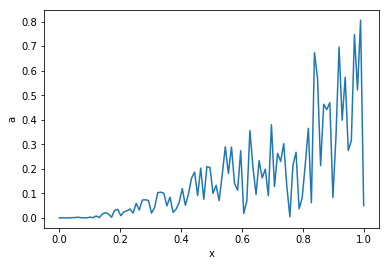

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.751,0.291,0.821,0.45,0.0565,0.463,...,0.465,0.508,0.0275,0.696,0.603,0.638


In [9]:
p2 = p.interp(p2)

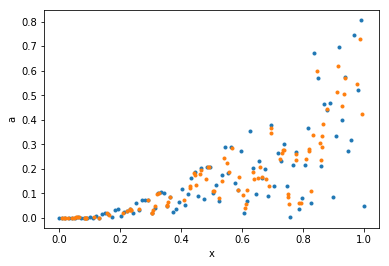

In [10]:
p.plot('x', 'a', '.')
p.interp(p2[['x']], method='linear').plot('x', 'a', '.')

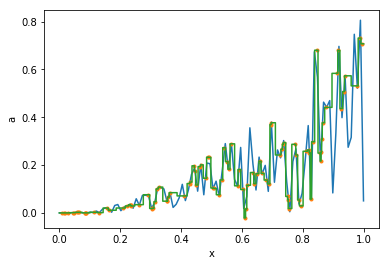

In [11]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [12]:
p.interp(p2)

x,0.751,0.291,0.821,0.45,0.0565,0.463,...,0.465,0.508,0.0275,0.696,0.603,0.638
y,0.0996,0.895,0.378,0.583,0.71,0.898,...,0.93,0.395,0.102,0.76,0.272,0.415
a,0.056,0.076,0.252,0.116,0.00244,0.194,...,0.201,0.102,4.04e-05,0.369,0.0978,0.169


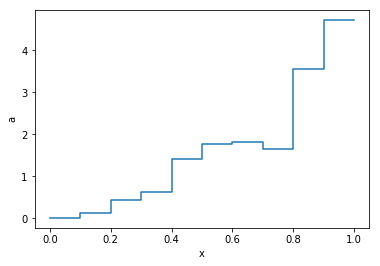

In [13]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
#g.plot('counts')

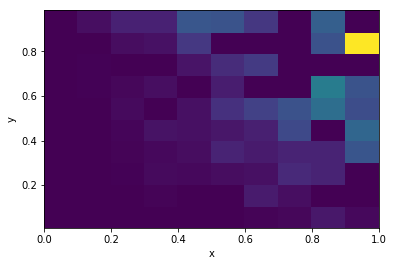

In [14]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [15]:
gn['a']

y \ x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
[0.009 0.106],0.00108,0.00516,0,0,0,0,0.0183,0.0418,0.145,0.0504
[0.106 0.204],0.000158,0,0,0.0229,0,0,0.159,0.0816,0,0
[0.204 0.301],0.00112,0,0.00926,0.0558,0.0515,0.0708,0.0958,0.258,0.213,0
[0.301 0.399],0,0.00316,0.0197,0.0488,0.0759,0.213,0.163,0.215,0.217,0.59
[0.399 0.496],0.00123,0,0.0322,0.106,0.0909,0.14,0.199,0.498,0,0.732
[0.496 0.594],0.000961,0.00783,0.0529,0,0.0965,0.314,0.438,0.566,0.807,0.521
[0.594 0.691],0,0.016,0.0363,0.0846,0,0.177,0,0,0.932,0.573
[0.691 0.789],0.00289,0.0155,0,0,0.119,0.274,0.38,0,0,0
[0.789 0.886],0,0,0.0711,0.101,0.367,0,0,0,0.568,2.25
[0.886 0.984],0,0.0875,0.206,0.208,0.598,0.578,0.356,0,0.674,0


In [16]:
np.sum(gn['a'], axis='y')

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.00745,0.135,0.427,0.626,1.4,1.77,1.81,1.66,3.56,4.71


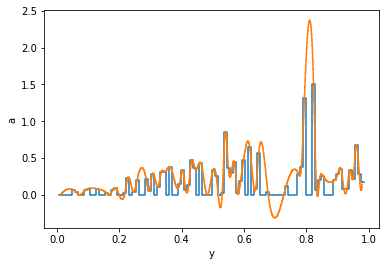

In [17]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

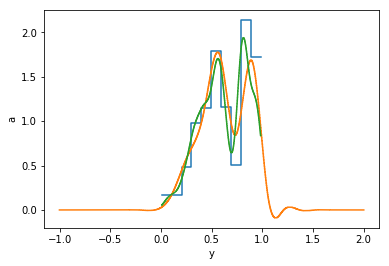

In [18]:
p.histogram('y', density=True).plot('a')
p.histogram(y=np.linspace(-1,2,20), density=True).interp(y=1000).plot('a')
p.kde(y=1000, density=True, bw=0.05).plot('a')

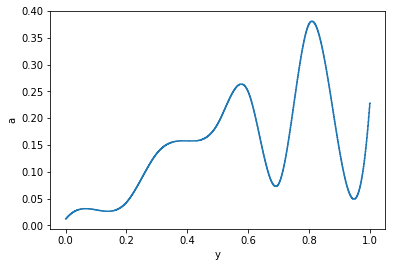

In [19]:
p.binwise(y=np.linspace(-0.1,1.1,13), function='mean').interp(y=1000, method='cubic').plot('a')

In [20]:
g = p.histogram(x=10)

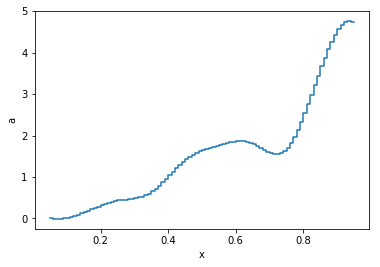

In [21]:
g.interp(x=100).plot('a')

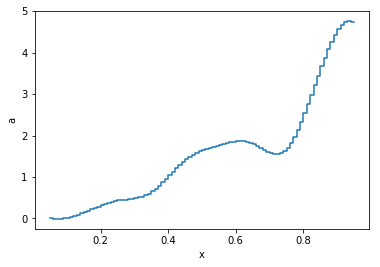

In [22]:
g.interp(x=100).plot('a')

In [23]:
p.histogram(x=10).grid

Grid(
Axis("x",
points = None,
edges = edges: array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7, 0.8],
       [0.8, 0.9],
       [0.9, 1. ]]))
nbins = 10),)

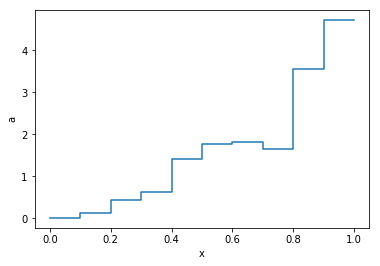

In [24]:
# or in one line
p.histogram('x').plot('a')

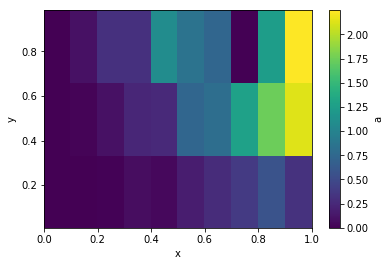

In [25]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', y=3).plot('a', cbar=True)

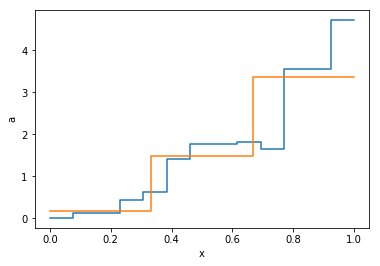

In [26]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [27]:
g['a']

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.00745,0.135,0.427,0.626,1.4,1.77,1.81,1.66,3.56,4.71


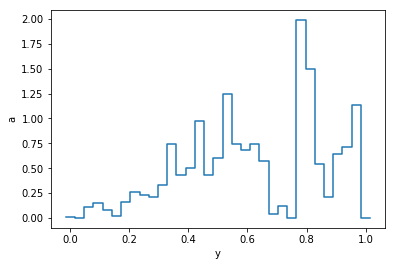

In [28]:
p.histogram(y=np.linspace(0,1,33)).plot('a')

In [29]:
# the returned object is a GridData type
p.histogram(x=2000, density=True)

x,[0. 0.001],[0.001 0.001],[0.001 0.002],[0.002 0.002],[0.002 0.003],[0.003 0.003],...,[0.997 0.998],[0.998 0.998],[0.998 0.999],[0.999 0.999],[0.999 1. ],[1. 1.]
y,36.4,0,0,0,0,0,...,0,0,0,0,0,1.99
a,0,0,0,0,0,0,...,0,0,0,0,0,6.26
density,20,0,0,0,0,0,...,0,0,0,0,0,20


In [32]:
from sklearn import datasets

In [33]:
b = datasets.fetch_california_housing()

In [34]:
b['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [35]:
b.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [36]:
d = pn.PointData({k:b['data'][:,i] for i,k in enumerate(b['feature_names'])})

In [37]:
d

MedInc,8.33,8.3,7.26,5.64,3.85,4.04,...,3.71,1.56,2.56,1.7,1.87,2.39
HouseAge,41,21,52,52,52,52,...,28,25,18,17,18,16
AveRooms,6.98,6.24,8.29,5.82,6.28,4.76,...,6.78,5.05,6.11,5.21,5.33,5.25
AveBedrms,1.02,0.972,1.07,1.07,1.08,1.1,...,1.15,1.13,1.32,1.12,1.17,1.16
Population,322,2400,496,558,565,413,...,1040,845,356,1010,741,1390
AveOccup,2.56,2.11,2.8,2.55,2.18,2.14,...,3.03,2.56,3.12,2.33,2.12,2.62
Latitude,37.9,37.9,37.9,37.9,37.9,37.9,...,39.3,39.5,39.5,39.4,39.4,39.4
Longitude,-122,-122,-122,-122,-122,-122,...,-122,-121,-121,-121,-121,-121


In [38]:
d.binwise(HouseAge=20, function='mean') #.plot('AveRooms')

HouseAge,[1. 3.55],[3.55 6.1 ],[6.1 8.65],[ 8.65 11.2 ],[11.2 13.75],[13.75 16.3 ],...,[36.7 39.25],[39.25 41.8 ],[41.8 44.35],[44.35 46.9 ],[46.9 49.45],[49.45 52. ]
MedInc,5.28,4.77,4.46,4.08,4.08,4.18,...,3.57,3.32,3.38,3.54,3.42,3.83
AveRooms,7.3,5.98,6.26,6.12,6.02,6.01,...,5,4.8,4.86,4.94,4.99,5.08
AveBedrms,1.24,1.12,1.16,1.2,1.17,1.15,...,1.06,1.05,1.05,1.04,1.06,1.07
Population,2.49e+03,2.5e+03,2.29e+03,1.86e+03,1.93e+03,1.62e+03,...,1.11e+03,1.07e+03,1.08e+03,1.04e+03,1.01e+03,941
AveOccup,2.76,3.02,3.17,2.89,2.89,2.88,...,3.03,3.04,2.97,6.08,2.83,2.82
Latitude,35.4,35.1,35.7,35.8,35.8,35.8,...,35.4,35.4,35.4,35.6,35.8,36.5
Longitude,-119,-119,-119,-119,-119,-120,...,-119,-119,-120,-120,-120,-121


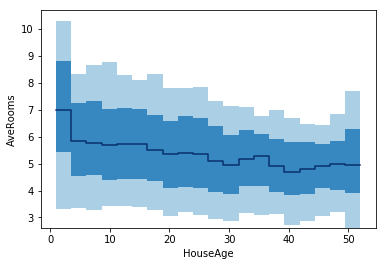

In [39]:
d.binwise(HouseAge=20, function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 95])).plot_bands('AveRooms')

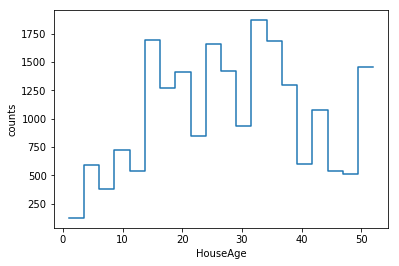

In [62]:
d.histogram(HouseAge=20).plot('counts')

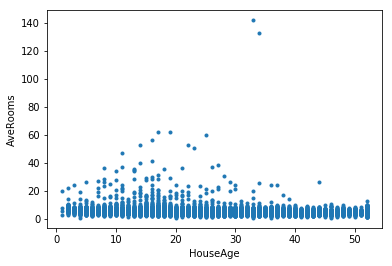

In [41]:
d.plot('HouseAge', 'AveRooms', '.')

In [42]:
h = d.histogram(Latitude=20, Longitude=20, density=True)

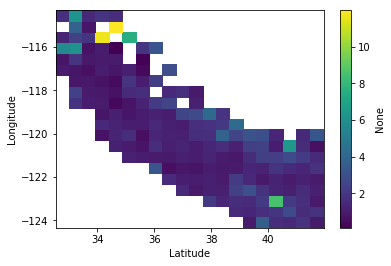

In [43]:
(h['density'] / h['Population']).plot(cbar=True)

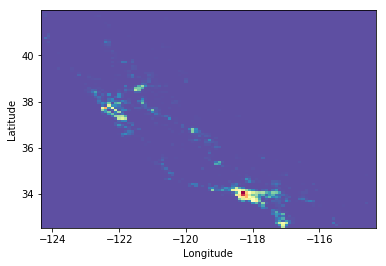

In [69]:
d.histogram(Longitude=100, Latitude=100).plot('Population', cmap='Spectral_r')

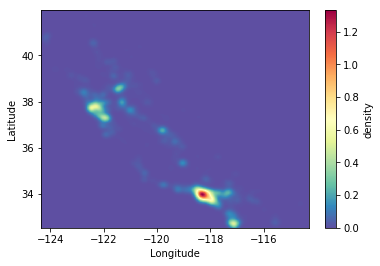

In [74]:
d.kde(Longitude=1000, Latitude=1000, bw=0.1).plot('density', cmap='Spectral_r', cbar=True)

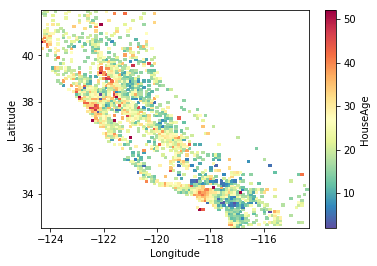

In [61]:
d.binwise(Latitude=100, Longitude=100, function='mean').T.plot('HouseAge', cmap='Spectral_r', cbar=True)

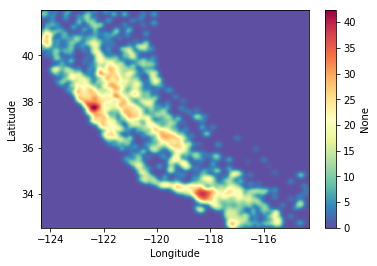

In [121]:
(d.binwise(Latitude=100, Longitude=100, function='mean', fill_value=0).kde(Longitude=1000, Latitude=1000, bw=0.1, density=False)['HouseAge']/100).plot(cmap='Spectral_r', cbar=True)

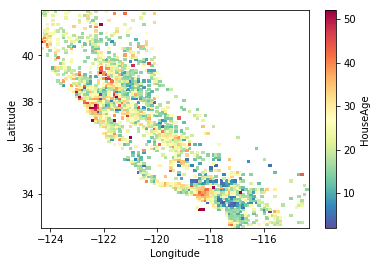

In [105]:
d.binwise(Latitude=100, Longitude=100, function='median').T.plot('HouseAge', cmap='Spectral_r', cbar=True)

In [99]:
age = d.binwise(Latitude=100, Longitude=100, function='mean')['HouseAge']

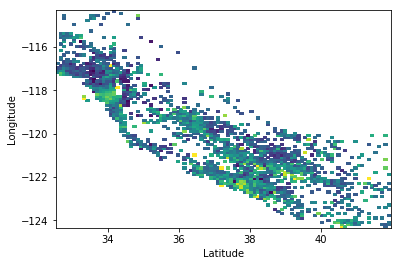

In [110]:
age.plot()

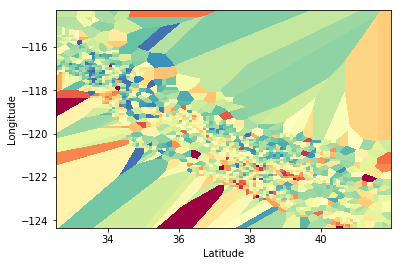

In [102]:
age.interp(Latitude=1000, Longitude=1000, method='nearest').plot( cmap='Spectral_r')

In [77]:
#.kde(Latitude=100, Longitude=100, bw=0.1).T.plot('HouseAge', cmap='Spectral_r', cbar=True)

/home/peller/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/peller/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


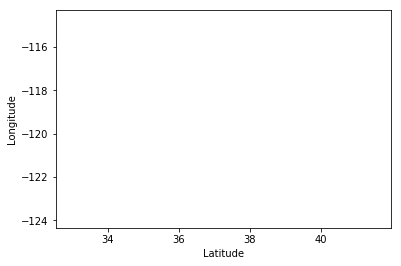

In [108]:
age.resample(Latitude=10, Longitude=10).plot()